In [1]:
path = r"C:\Users\felip\OneDrive - Universidad Técnica Federico Santa María\Documentos\UV\EEG_ERP_Analysis"



In [2]:
import pandas as pd
import os

# Lista de archivos a procesar
files = [
    "AVE_Baseline Correction_Con_0.1Hz_2_Raw Data-sLorRoi.txt",
    "AVE_Baseline Correction_Inc_0.1Hz_2_Raw Data-sLorRoi.txt"
]

# Nombres cortos para el diccionario
names = ['con', 'inc']

# Ruta base
base_path = rf"{path}\Data\ASEM_sLoreta_1000_txt"

# Diccionario para almacenar los DataFrames
dataframes = {}

# Procesar cada archivo
for file_name, name in zip(files, names):
    file_path = os.path.join(base_path, file_name)
    with open(file_path, "r") as file:
        lines = file.readlines()
    
    # Procesar las líneas del archivo
    data = [list(map(float, line.split())) for line in lines if line.strip()]  # Evita líneas vacías

    # Crear el DataFrame y almacenarlo en el diccionario
    df = pd.DataFrame(data)
    dataframes[name] = df

    # Mostrar las primeras filas del DataFrame
    print(f"DataFrame para {name}:")
    print(df.head())
    print("\n")


DataFrame para con:
         0         1         2         3         4         5         6   \
0  0.000095  0.000064  0.000105  0.000117  0.000099  0.000038  0.000091   
1  0.000084  0.000063  0.000098  0.000104  0.000109  0.000056  0.000092   
2  0.000072  0.000062  0.000089  0.000097  0.000117  0.000088  0.000084   
3  0.000061  0.000058  0.000077  0.000092  0.000126  0.000123  0.000072   
4  0.000056  0.000054  0.000067  0.000086  0.000137  0.000148  0.000062   

         7         8         9   ...        72        73        74        75  \
0  0.000059  0.000181  0.000066  ...  0.000069  0.000034  0.000095  0.000038   
1  0.000057  0.000199  0.000089  ...  0.000055  0.000035  0.000095  0.000037   
2  0.000057  0.000200  0.000133  ...  0.000033  0.000040  0.000082  0.000041   
3  0.000055  0.000189  0.000182  ...  0.000014  0.000050  0.000064  0.000049   
4  0.000049  0.000178  0.000211  ...  0.000009  0.000061  0.000059  0.000058   

         76        77        78        79       

In [3]:
import pandas as pd
import os

# Ruta al archivo de nombres de regiones
region_file_path = rf"{path}\AAL_eeg-ROInames.txt"

# Leer el archivo de nombres de regiones
with open(region_file_path, "r") as file:
    lines = file.readlines()

# Crear un diccionario para mapear números a nombres de regiones
region_mapping = {}
for line in lines:
    if line.strip():  # Evitar líneas vacías
        number, region = line.split("-", 1)
        region_mapping[int(number) - 1] = region.strip()  # Restar 1 para que coincida con los índices de las columnas

# Aplicar el mapeo de nombres de regiones a cada DataFrame
for name, df in dataframes.items():
    df.rename(columns=region_mapping, inplace=True)
    print(f"DataFrame actualizado para {name}:")
    print(df.head())
    print("\n")


DataFrame actualizado para con:
   Precentral_L  Precentral_R  Frontal_Sup_L  Frontal_Sup_R  \
0      0.000095      0.000064       0.000105       0.000117   
1      0.000084      0.000063       0.000098       0.000104   
2      0.000072      0.000062       0.000089       0.000097   
3      0.000061      0.000058       0.000077       0.000092   
4      0.000056      0.000054       0.000067       0.000086   

   Frontal_Sup_Orb_L  Frontal_Sup_Orb_R  Frontal_Mid_L  Frontal_Mid_R  \
0           0.000099           0.000038       0.000091       0.000059   
1           0.000109           0.000056       0.000092       0.000057   
2           0.000117           0.000088       0.000084       0.000057   
3           0.000126           0.000123       0.000072       0.000055   
4           0.000137           0.000148       0.000062       0.000049   

   Frontal_Mid_Orb_L  Frontal_Mid_Orb_R  ...  Temporal_Sup_L  Temporal_Sup_R  \
0           0.000181           0.000066  ...        0.000069        0.

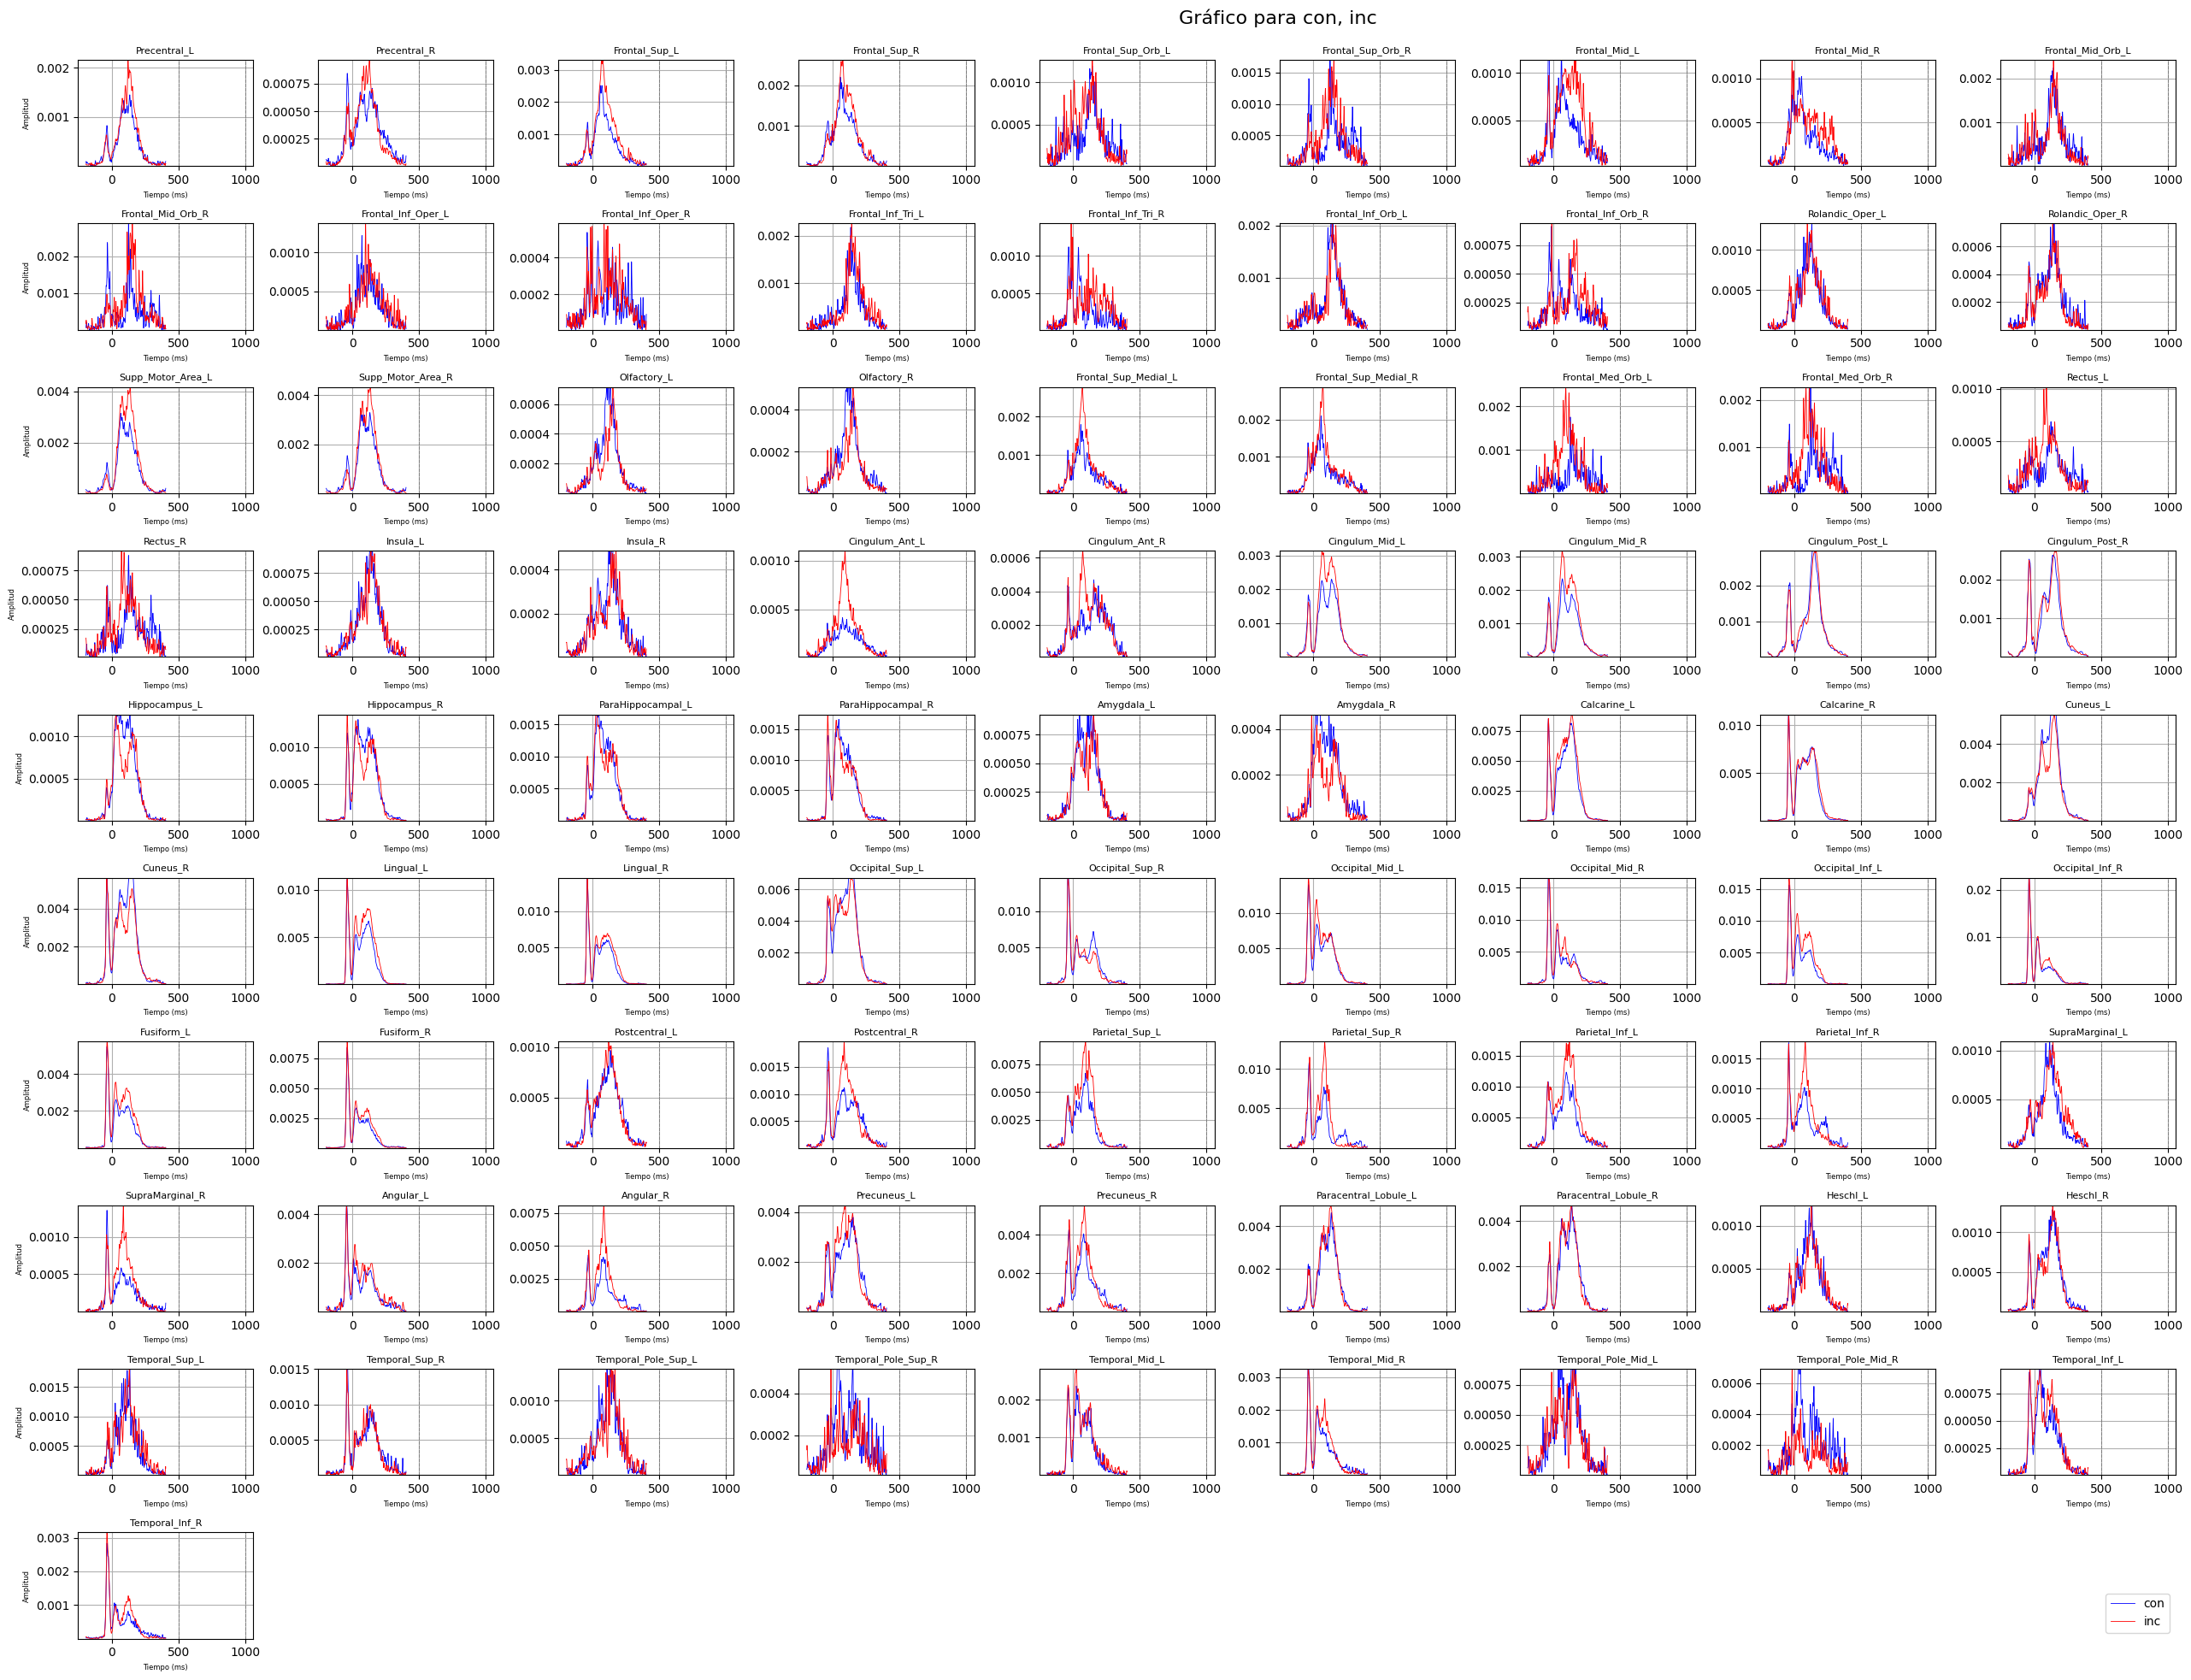

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Definir los colores como un parámetro
colors = {
    'con': 'b',   # Azul
    'inc': 'r',   # Verde
    
}

# Función para generar los gráficos
def plot_regions(dataframes, regions, title, colors, sample_rate=1024, pre_stimulus=200, line_width=0.6):
    # Crear la figura
    fig, axes = plt.subplots(nrows=10, ncols=9, figsize=(30, 20))
    axes = axes.flatten()  # Para hacer un array 1D de todos los subgráficos
    
    # Crear un arreglo de tiempo basado en la frecuencia de muestreo
    time = (np.arange(0, dataframes[regions[0]].shape[0]) - pre_stimulus) / sample_rate * 1000  # Tiempo en milisegundos

    # Iterar sobre cada DataFrame
    for idx, (name, df) in enumerate(dataframes.items()):
        if name not in regions:
            continue

        # Solo tomar las primeras 82 columnas (regiones consideradas)
        df_regions = df.iloc[:, :82]

        # Crear los gráficos para cada región
        for i, region in enumerate(df_regions.columns):
            ax = axes[i]
            ax.plot(time, df_regions[region], color=colors[name], label=name, linewidth=line_width)  # Graficar la región con color
            ax.set_title(region, fontsize=8)  # Título con el nombre de la región
            ax.grid(True)  # Activar la grilla
            
            # Mostrar el eje X con los valores de tiempo en milisegundos
            ax.set_xlabel('Tiempo (ms)', fontsize=6)
            
            # Solo mostrar la etiqueta de "Amplitud" en la primera columna (índices 0, 9, 18, ..., 72)
            if i % 9 == 0:
                ax.set_ylabel('Amplitud', fontsize=6)
            else:
                ax.set_ylabel('')  # Eliminar la etiqueta en otras columnas

            # Configurar el eje Y (amplitudes) para que sea visible
            ax.set_ylim(df_regions[region].min(), df_regions[region].max())

            # Añadir una grilla adicional en 500 ms
            ax.axvline(x=500, color='gray', linestyle='--', linewidth=0.7)  # Línea gris en 500 ms
            ax.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)  # Línea gris en 1000 ms

        # Dejar en blanco las posiciones para las regiones no consideradas (columnas 83 a 90)
        for j in range(82, 90):  # De la columna 83 a la 90, dejar en blanco
            axes[j].axis('off')

    # Ajustar el espacio entre los subgráficos y dejar espacio arriba para el título
    plt.tight_layout()
    plt.subplots_adjust(top=0.95, right=0.85)  # Ajustar el top para dejar espacio para el título y leyenda

    # Mostrar la figura
    plt.suptitle(title, fontsize=16)

    # Leyenda abajo a la derecha
    handles, labels = axes[0].get_legend_handles_labels()  # Obtener los handles de la leyenda
    plt.legend(handles, labels, loc='lower right', fontsize=10, bbox_to_anchor=(1, 0))  # Ajustar la leyenda abajo a la derecha

    plt.show()

# Crear la primera figura para 'con', 'inc', 'rel'
plot_regions(dataframes, ['con', 'inc'], 'Gráfico para con, inc', colors)

